<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework2_3(b)_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== BASE (no scaling) Model Parameters ===
      bias: 0.214542
      area: 860.229500
  bedrooms: 0.696991
 bathrooms: 0.348578
   stories: 0.507062
  mainroad: 0.190943
 guestroom: 0.055929
  basement: 0.095667
hotwaterheating: 0.021399
airconditioning: 0.109873
   parking: 0.177907
  prefarea: 0.067815

=== STANDARDIZED Model Parameters ===
      bias: 4147996.343276
      area: 490551.360411
  bedrooms: 154680.156995
 bathrooms: 519908.584951
   stories: 339654.926060
  mainroad: 226367.233182
 guestroom: 172633.681403
  basement: 128753.118145
hotwaterheating: 174349.367810
airconditioning: 386396.350450
   parking: 246361.269565
  prefarea: 250644.227210

=== NORMALIZED Model Parameters ===
      bias: 1866706.001894
      area: 598198.652405
  bedrooms: 829950.752844
 bathrooms: 423003.071980
   stories: 763182.287442
  mainroad: 1580702.482928
 guestroom: 424517.692639
  basement: 609571.801729
hotwaterheating: 197947.313116
airconditioning: 867878.322244
   parking: 632199.51

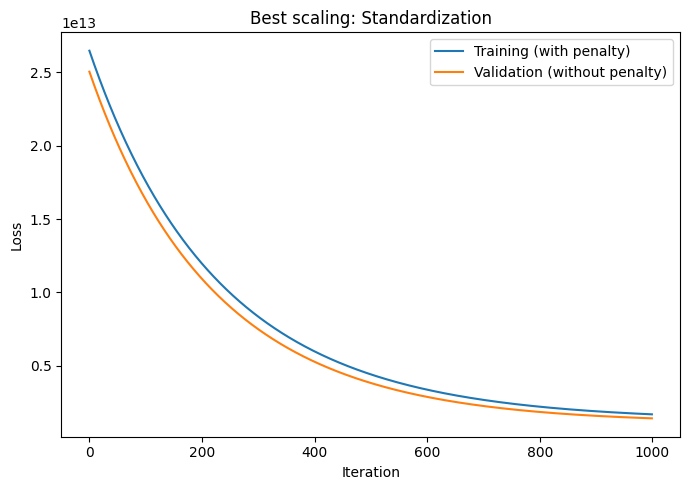

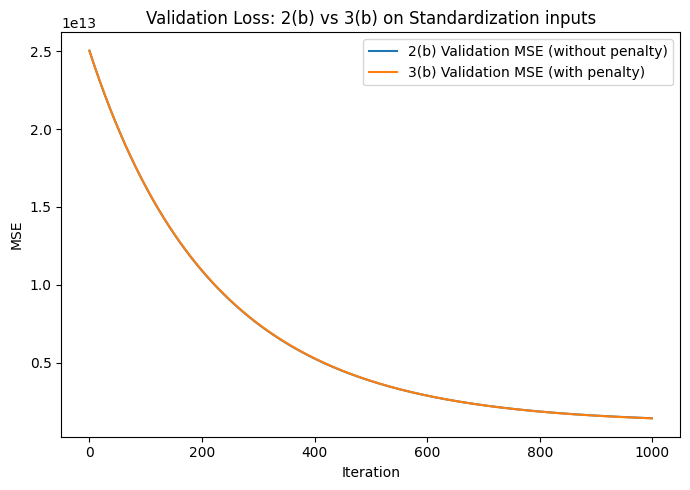


=== Same-scaling comparison: 2(b) vs 3(b) ===
             Model          Train MSE          Val   MSE  Train R²  Val   R²
2(b) Unregularized 1577579675564.7581 1418053438140.5461    0.5465    0.5982
3(b) Ridge (λ=0.1) 1586917174036.8350 1411249246344.8789    0.5438    0.6002

=== 2(b) standardization parameters ===
              bias:  4147996.343276
              area:  490551.360411
          bedrooms:  154680.156995
         bathrooms:  519908.584951
           stories:  339654.926060
          mainroad:  226367.233182
         guestroom:  172633.681403
          basement:  128753.118145
   hotwaterheating:  174349.367810
   airconditioning:  386396.350450
           parking:  246361.269565
          prefarea:  250644.227210

=== 3(b) Ridge λ=0.1 parameters ===
              bias:  4147996.343276
              area:  467462.512047
          bedrooms:  155606.695530
         bathrooms:  494225.960682
           stories:  325372.327933
          mainroad:  218417.658054
         gue

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

# -----------------------------
# Load dataset
# -----------------------------
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
df = pd.read_csv(url)

features = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking","prefarea"]
target   = "price"

# Convert 'yes'/'no' columns to numerical (1/0)
yes_no_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

X = df[features].values.astype(float)
y = df[target].values.astype(float).reshape(-1, 1)

# -----------------------------
# Train/Validation split (80/20)
# -----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=100, shuffle=True
)

def add_bias(Z):
    return np.hstack([np.ones((Z.shape[0], 1)), Z])

# -----------------------------
# Gradient Descent (from scratch)
# -----------------------------
def train_gd(X, y, X_val, y_val, lr=1e-6, epochs=1000):
    n, d = X.shape
    theta = np.zeros((d, 1))
    train_losses, val_losses = [], []
    for t in range(epochs):
        y_hat = X @ theta
        grad  = (2.0 / n) * (X.T @ (y_hat - y))
        theta -= lr * grad
        train_losses.append(np.mean((y_hat - y) ** 2))
        val_losses.append(np.mean(((X_val @ theta) - y_val) ** 2))
    return theta, np.array(train_losses), np.array(val_losses)

def evaluate(Xtr, ytr, Xva, yva, theta):
    ytr_hat = Xtr @ theta
    yva_hat = Xva @ theta
    train_mse = np.mean((ytr_hat - ytr)**2)
    val_mse   = np.mean((yva_hat - yva)**2)
    train_r2  = r2_score(ytr, ytr_hat)
    val_r2    = r2_score(yva, yva_hat)
    return train_mse, val_mse, train_r2, val_r2

# ============================================================================
# 1) Baseline (NO SCALING)
# ============================================================================
Xtr_base = add_bias(X_train)
Xva_base = add_bias(X_val)

BASE_LR   = 1e-10    # Reduced step due to unscaled features
EPOCHS    = 1000

theta_base, trL_base, vaL_base = train_gd(Xtr_base, y_train, Xva_base, y_val, lr=BASE_LR, epochs=EPOCHS)
base_train_mse, base_val_mse, base_train_r2, base_val_r2 = evaluate(Xtr_base, y_train, Xva_base, y_val, theta_base)

# ============================================================================
# 2) STANDARDIZATION (inputs only)
# ============================================================================
std_scaler = StandardScaler()
Xtr_std = std_scaler.fit_transform(X_train)
Xva_std = std_scaler.transform(X_val)

Xtr_std_b = add_bias(Xtr_std)
Xva_std_b = add_bias(Xva_std)

STD_LR = 1e-3  # larger, stable step after scaling
theta_std, trL_std, vaL_std = train_gd(Xtr_std_b, y_train, Xva_std_b, y_val, lr=STD_LR, epochs=EPOCHS)
std_train_mse, std_val_mse, std_train_r2, std_val_r2 = evaluate(Xtr_std_b, y_train, Xva_std_b, y_val, theta_std)

# ============================================================================
# 3) NORMALIZATION (Min-Max to [0,1], inputs only)
# ============================================================================
minmax = MinMaxScaler()
Xtr_minmax = minmax.fit_transform(X_train)
Xva_minmax = minmax.transform(X_val)

Xtr_minmax_b = add_bias(Xtr_minmax)
Xva_minmax_b = add_bias(Xva_minmax)

NORM_LR = 1e-3
theta_norm, trL_norm, vaL_norm = train_gd(Xtr_minmax_b, y_train, Xva_minmax_b, y_val, lr=NORM_LR, epochs=EPOCHS)
norm_train_mse, norm_val_mse, norm_train_r2, norm_val_r2 = evaluate(Xtr_minmax_b, y_train, Xva_minmax_b, y_val, theta_norm)

# -----------------------------
# PRINT PARAMETERS (optional)
# -----------------------------
def print_params(label, theta, feature_names):
    print(f"\n=== {label} Model Parameters ===")
    for name, coef in zip(["bias"] + feature_names, theta.flatten()):
        print(f"{name:>10}: {coef:.6f}")

print_params("BASE (no scaling)", theta_base, features)
print_params("STANDARDIZED", theta_std, features)
print_params("NORMALIZED", theta_norm, features)


# -----------------------------
# METRICS COMPARISON TABLE
# -----------------------------
summary = pd.DataFrame({
    "Setting": ["No Scaling (baseline)", "Standardized (inputs)", "Normalized (inputs)"],
    "LR": [BASE_LR, STD_LR, NORM_LR],
    "Epochs": [EPOCHS, EPOCHS, EPOCHS],
    "Train MSE": [base_train_mse, std_train_mse, norm_train_mse],
    "Val   MSE": [base_val_mse,   std_val_mse,   norm_val_mse],
    "Train R²":  [base_train_r2,  std_train_r2,  norm_train_r2],
    "Val   R²":  [base_val_r2,    std_val_r2,    norm_val_r2],
})
print("\n\n=== Comparison (MSE lower is better; R² closer to 1 is better) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:0.4f}"))



def train_gd_ridge(X, y, X_val, y_val, lr=1e-3, epochs=1000, lambda_=1e-2, penalize_bias=False):
    """
    Train with L2 penalty *only on training*:
      J_train = MSE + λ * ||θ||²   (bias not penalized by default)
    Validation loss is plain MSE (no penalty).
    Returns: theta, [train penalized loss history], [val MSE history]
    """
    n, d = X.shape
    theta = np.zeros((d, 1))
    tr_losses, va_losses = [], []

    reg_mask = np.ones((d,1))
    if not penalize_bias:
        reg_mask[0,0] = 0.0

    for _ in range(epochs):
        y_hat = X @ theta
        mse   = np.mean((y_hat - y) ** 2)
        pen   = lambda_ * np.sum((reg_mask * theta) ** 2)
        tr_losses.append(mse + pen)

        grad = (2.0/n) * (X.T @ (y_hat - y)) + 2.0 * lambda_ * (reg_mask * theta)
        theta -= lr * grad

        va_losses.append(np.mean(((X_val @ theta) - y_val) ** 2))

    return theta, np.array(tr_losses), np.array(va_losses)

def evaluate_plain(Xtr, ytr, Xva, yva, theta):
    from sklearn.metrics import r2_score
    ytr_hat = Xtr @ theta
    yva_hat = Xva @ theta
    tr_mse  = np.mean((ytr_hat - ytr)**2)
    va_mse  = np.mean((yva_hat - yva)**2)
    tr_r2   = r2_score(ytr, ytr_hat)
    va_r2   = r2_score(yva, yva_hat)
    return tr_mse, va_mse, tr_r2, va_r2

# ------------------------------------------------------------
# Pick best scaling from 2(b) (based on validation MSE)
# ------------------------------------------------------------
best_scaling = "standardization" if std_val_mse <= norm_val_mse else "normalization"
print(f"\n>>> Best scaling from 2(b): {best_scaling} "
      f"(Std Val MSE={std_val_mse:.3e}, Norm Val MSE={norm_val_mse:.3e})")

if best_scaling == "standardization":
    Xtr_best, Xva_best = Xtr_std_b, Xva_std_b
    va_curve_2b        = vaL_std
    ref_train_mse, ref_val_mse = std_train_mse, std_val_mse
    ref_train_r2,  ref_val_r2  = std_train_r2,  std_val_r2
    theta_ref = theta_std
else:
    Xtr_best, Xva_best = Xtr_minmax_b, Xva_minmax_b
    va_curve_2b        = vaL_norm
    ref_train_mse, ref_val_mse = norm_train_mse, norm_val_mse
    ref_train_r2,  ref_val_r2  = norm_train_r2,  norm_val_r2
    theta_ref = theta_norm

# ------------------------------------------------------------
# Grid search over λ; evaluation remains plain MSE
# ------------------------------------------------------------
LAMBDAS = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
LR      = 1e-3
EPOCHS  = EPOCHS  # reuse from 2(b)

ridge_runs   = []
ridge_curves = {}

for lam in LAMBDAS:
    th, trL_pen, vaL_plain = train_gd_ridge(
        Xtr_best, y_train, Xva_best, y_val,
        lr=LR, epochs=EPOCHS, lambda_=lam, penalize_bias=False
    )
    tr_mse, va_mse, tr_r2, va_r2 = evaluate_plain(Xtr_best, y_train, Xva_best, y_val, th)
    ridge_runs.append((lam, tr_mse, va_mse, tr_r2, va_r2, th))
    ridge_curves[lam] = (trL_pen, vaL_plain)

# Best λ by lowest validation MSE
lam_best, tr_mse_best, va_mse_best, tr_r2_best, va_r2_best, theta_best = sorted(ridge_runs, key=lambda x: x[2])[0]
print(f">>> Best λ: {lam_best:g}")

# ------------------------------------------------------------
# Figure 1: 3(b) best scaling — Training (penalized) vs Validation (MSE)
# ------------------------------------------------------------
trL_pen_best, vaL_best = ridge_curves[lam_best]
plt.figure(figsize=(7,5))
plt.plot(trL_pen_best, label=f"Training (with penalty)")
plt.plot(vaL_best,     label="Validation (without penalty)")
plt.xlabel("Iteration"); plt.ylabel("Loss")
plt.title(f"Best scaling: {best_scaling.capitalize()}")
plt.legend(); plt.tight_layout(); plt.show()

# ------------------------------------------------------------
# Figure 2: Overlay 2(b) vs 3(b) on validation MSE (same scaling)
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(va_curve_2b, label="2(b) Validation MSE (without penalty)")
plt.plot(vaL_best,    label=f"3(b) Validation MSE (with penalty)")
plt.xlabel("Iteration"); plt.ylabel("MSE")
plt.title(f"Validation Loss: 2(b) vs 3(b) on {best_scaling.capitalize()} inputs")
plt.legend(); plt.tight_layout(); plt.show()

# ------------------------------------------------------------
# Compact comparison table (same scaling)
# ------------------------------------------------------------
comp = pd.DataFrame({
    "Model":     ["2(b) Unregularized", f"3(b) Ridge (λ={lam_best:g})"],
    "Train MSE": [ref_train_mse, tr_mse_best],
    "Val   MSE": [ref_val_mse,   va_mse_best],
    "Train R²":  [ref_train_r2,  tr_r2_best],
    "Val   R²":  [ref_val_r2,    va_r2_best],
})
print("\n=== Same-scaling comparison: 2(b) vs 3(b) ===")
print(comp.to_string(index=False, float_format=lambda x: f"{x:0.4f}"))

# (Optional) show coefficient shrinkage
def print_params(label, theta, feature_names):
    print(f"\n=== {label} parameters ===")
    for name, coef in zip(["bias"] + feature_names, theta.flatten()):
        print(f"{name:>18}: {coef: .6f}")

print_params(f"2(b) {best_scaling}", theta_ref, features)
print_params(f"3(b) Ridge λ={lam_best:g}", theta_best, features)
